In [12]:
# pip uninstall tensorflow

Found existing installation: tensorflow 2.7.0
Uninstalling tensorflow-2.7.0:
  Would remove:
    /usr/local/bin/estimator_ckpt_converter
    /usr/local/bin/import_pb_to_tensorboard
    /usr/local/bin/saved_model_cli
    /usr/local/bin/tensorboard
    /usr/local/bin/tf_upgrade_v2
    /usr/local/bin/tflite_convert
    /usr/local/bin/toco
    /usr/local/bin/toco_from_protos
    /usr/local/lib/python3.7/dist-packages/tensorflow-2.7.0.dist-info/*
    /usr/local/lib/python3.7/dist-packages/tensorflow/*
Proceed (y/n)? y
y
  Successfully uninstalled tensorflow-2.7.0


In [1]:
# pip install tensorflow

In [2]:
# pip install tensorflow-text

     |████████████████████████████████| 4.9 MB 4.4 MB/s 


In [3]:
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np # linear algebra
import tensorflow as tf
from tensorflow.keras.preprocessing import text,sequence
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense,Dropout,Activation
from tensorflow.keras.layers import Embedding
from tensorflow.keras.layers import Conv1D,GlobalMaxPooling1D,MaxPooling1D
from sklearn.model_selection import train_test_split
import tensorflow_hub as hub
import tensorflow_text as text
import re    #for regex
import string
import nltk
nltk.download('stopwords')
from wordcloud import WordCloud
from nltk.corpus import stopwords

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


In [4]:
import os, glob
from google.colab import drive
drive.mount('/content/drive')
path = "/content/drive/My Drive/Team project"

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [5]:
os.chdir(path)
os.listdir(path)

['Film platform survey.gform', 'train.tsv', 'IMDB Dataset.csv']

In [8]:
s1=pd.read_table("train.tsv",sep='\t')

In [7]:
s2=pd.read_csv('IMDB Dataset.csv')

In [9]:
s1

,PhraseId,SentenceId,Phrase,Sentiment
0,1,1,A series of escapades demonstrating the adage ...,1
1,2,1,A series of escapades demonstrating the adage ...,2
2,3,1,A series,2
3,4,1,A,2
4,5,1,series,2
...,...,...,...,...
156055,156056,8544,Hearst 's,2
156056,156057,8544,forced avuncular chortles,1
156057,156058,8544,avuncular chortles,3
156058,156059,8544,avuncular,2


In [10]:
s1=s1[['Phrase','Sentiment']]

In [11]:
s1

,Phrase,Sentiment
0,A series of escapades demonstrating the adage ...,1
1,A series of escapades demonstrating the adage ...,2
2,A series,2
3,A,2
4,series,2
...,...,...
156055,Hearst 's,2
156056,forced avuncular chortles,1
156057,avuncular chortles,3
156058,avuncular,2


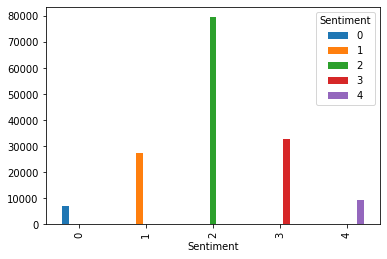

In [12]:
C = ['Sentiment']

for i in C:
    ch = pd.crosstab(s[i], s['Sentiment'])  
    ch.plot.bar()   
    plt.show() 

In [13]:
s2

,review,sentiment
0,One of the other reviewers has mentioned that ...,positive
1,A wonderful little production. <br /><br />The...,positive
2,I thought this was a wonderful way to spend ti...,positive
3,Basically there's a family where a little boy ...,negative
4,"Petter Mattei's ""Love in the Time of Money"" is...",positive
...,...,...
49995,I thought this movie did a down right good job...,positive
49996,"Bad plot, bad dialogue, bad acting, idiotic di...",negative
49997,I am a Catholic taught in parochial elementary...,negative
49998,I'm going to have to disagree with the previou...,negative


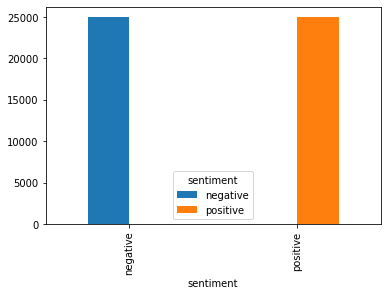

In [14]:
C = ['sentiment']

for i in C:
    ch = pd.crosstab(s2[i], s2['sentiment'])  
    ch.plot.bar()   
    plt.show()

In [15]:
s1
# 2=neutral, using neutral to replace the '2'

,Phrase,Sentiment
0,A series of escapades demonstrating the adage ...,1
1,A series of escapades demonstrating the adage ...,2
2,A series,2
3,A,2
4,series,2
...,...,...
156055,Hearst 's,2
156056,forced avuncular chortles,1
156057,avuncular chortles,3
156058,avuncular,2


In [21]:
target=s1.loc[s1['Sentiment'] == 2]
target

,Phrase,Sentiment
1,A series of escapades demonstrating the adage ...,2
2,A series,2
3,A,2
4,series,2
5,of escapades demonstrating the adage that what...,2
...,...,...
156053,beneath Hearst 's forced avuncular chortles,2
156054,Hearst 's forced avuncular chortles,2
156055,Hearst 's,2
156058,avuncular,2


In [24]:
target.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 79582 entries, 1 to 156059
Data columns (total 2 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   Phrase     79582 non-null  object
 1   Sentiment  79582 non-null  int64 
dtypes: int64(1), object(1)
memory usage: 1.8+ MB


In [33]:
target1 = target.head(25000)
target1

,Phrase,Sentiment
1,A series of escapades demonstrating the adage ...,neutral
2,A series,neutral
3,A,neutral
4,series,neutral
5,of escapades demonstrating the adage that what...,neutral
...,...,...
46990,", always brooding look",neutral
46991,always brooding look,neutral
46994,of I,neutral
46995,Am Trying to Break Your Heart,neutral


In [ ]:
# 有两不同格式的数据集，将train.tsv 文件中标签2数据提取两万五条 添加到IMDB Dataset csv 中定义名称为 neutral

In [40]:
s2

,review,sentiment
0,One of the other reviewers has mentioned that ...,positive
1,A wonderful little production. <br /><br />The...,positive
2,I thought this was a wonderful way to spend ti...,positive
3,Basically there's a family where a little boy ...,negative
4,"Petter Mattei's ""Love in the Time of Money"" is...",positive
...,...,...
49995,I thought this movie did a down right good job...,positive
49996,"Bad plot, bad dialogue, bad acting, idiotic di...",negative
49997,I am a Catholic taught in parochial elementary...,negative
49998,I'm going to have to disagree with the previou...,negative


In [44]:
target2=s2.rename(columns={'review':'Phrase', 'sentiment':'Sentiment'})

In [45]:
frames = [target1, target2]
result = pd.concat(frames)
result

,Phrase,Sentiment
1,A series of escapades demonstrating the adage ...,neutral
2,A series,neutral
3,A,neutral
4,series,neutral
5,of escapades demonstrating the adage that what...,neutral
...,...,...
49995,I thought this movie did a down right good job...,positive
49996,"Bad plot, bad dialogue, bad acting, idiotic di...",negative
49997,I am a Catholic taught in parochial elementary...,negative
49998,I'm going to have to disagree with the previou...,negative


In [46]:
result.to_csv('Sentiment_result.csv')